# Solution for Homework 5

In all problems below, please comment your code sufficiently well so that the grader can follow what you are doing with ease. For non-coding answers, please make sure to formulate your explanation and answers in the form of complete English sentences. It is not sufficient to just leave comments in the code (without full sentence explanations in problems that ask for those) or vice versa (to leave full sentence explanations but not code comments). You will need both to get full credit. 

## Problem 1

**Background:** A one-sample t-test can be used to decide whether or not a population mean is equal to a hypothesized value based on a sample drawn at random from a Normal population. More precisely, consider some measurable trait $X$ which has Normal distribution with mean $\mu$ and variance $\sigma^2$ in a population. Suppose we want to test the (one-sided) hypotheses 

$$ H_0: \mu = \mu_0 \qquad \mbox{ against } \qquad H_a: \mu > \mu_0$$

To perform a one-sample t-test for a data sample $(x_1, \ldots, x_n)$, we would calculate the test statistic 
$$t = \frac{\bar{x} - \mu_0}{s/\sqrt{n}} \sim t(n-1)$$
where $\bar{x} = \frac{1}{n} \sum\limits_{i=1}^n x_i$ is the sample mean and $s = \sqrt{\frac{1}{n-1} \sum\limits_{i=1}^n (x_i - \bar{x})^2}$ is the sample standard deviation. Then we would reject the null hypothesis in favor of the alternative at significance level $\alpha$, whenever the calculated test statistic value $t$ exceeds the $(1-\alpha)$-quantile of the t-distribution with n-1 degrees of freedom. 

The power of a statistical hypothesis test is defined as the probability to reject the null hyopothesis if the alternative hypothesis is true. The probability to reject the null hypothesis if it is actually true is called the type I error probability of the test. For a one-sample $t$-test the power depends on the sample size n, the effect size $\frac{\mu - \mu_0}{\sigma}$, and the significance level $\alpha$. 

**End of Background**

(a) Consider a Normal population with mean $\mu$ and variance $\sigma^2$. For random samples of size $n$ drawn from this population, we would like to find the power of a  1-sample t-test at significance level $\alpha = 0.05$ for the hypotheses:

$$ H_0: \mu = \mu_0 \qquad \mbox{ against } \qquad H_a: \mu > \mu_0$$

To simulate the power of this test, one would generate many independent samples of the same size n, find the t-test statistic value for each sample, compare them to the appropriate quantile and decide for each sample whether to reject the null hypothesis or not. The results can be used to estimate the power or type I error probability.

Write a function called `simulate_power(n, alpha, mu, mu_0, sigma)` that estimates the power of this test based on $m=10,000$ simulated samples. To get you started, you can find code below to generate a random sample from a specific Normal distribution and to compute sample mean $\bar{x}$ and sample standard deviation $s$ as well as the $(1-\alpha)$ t-quantile. 

In [1]:
from scipy import stats
import numpy as np
import math

np.random.seed(10)

# Example with specific parameter values
mu = 8              # true population mean 
mu_0 = 5            # hypothesized population mean 
sigma = 10          # true population variance
n=10                # sample size 
alpha = 0.05        # significance level 
m=10000             # number of independent samples simulated to estimate power
                    # Note: power estimates should converge to about 2 decimals 
                    # for this m-value. 

sample = stats.norm(mu,sigma).rvs(n) # generate random sample
x_bar = np.mean(sample)              # sample mean 
s = np.std(sample, ddof=1)           # sample standard deviation
t = (x_bar-mu_0)/(s/math.sqrt(n))    # calculated t-test statistic
quantile = stats.t(n-1).ppf(1-alpha) # quantile

def simulate_power(n, alpha, mu, mu_0, sigma):

    results = []
    for i in range(m):
        sample = stats.norm(mu,sigma).rvs(n) # generate random sample
        x_bar = np.mean(sample)              # sample mean 
        s = np.std(sample, ddof=1)           # sample standard deviation
        t = (x_bar-mu_0)/(s/math.sqrt(n))    # calculate t-test statistic
        results.append(t>quantile)           # compare test statistic to quantile and record decision
    return sum(results)/m                    # aggregate decisions to count errors. 

(b) Use your function to estimate the power of the one-sided 1-sample t-test for different values of $\mu$. Assume that $\mu_0 =5$, $\sigma = 10$, $n=10$, and $\alpha = 0.05$. Consider the values $\mu = 5,8,10,12$. Note, that if $\mu=5$ the null hypothesis is actually true. Recall, that in that case, the probability to reject the null is the type I error of the test. In the other cases, you are estimating the power of the test. 

Copy the table below into your answer and fill in the type I error and power estimates you obtained. 


| population mean $\mu$  | effect size  | estimated power |
|:-:|:-:|:-:|
| 5 | 0 | | 
    | 8  |     0.3  |   |
| 10  | 0.5  |   |
| 12  | 0.7|   |

In [2]:
# repeat power simulations for different values of mu

print(simulate_power(10, 0.05, 5, 5, 10))
print(simulate_power(10, 0.05, 8, 5, 10))
print(simulate_power(10, 0.05, 10, 5, 10))
print(simulate_power(10, 0.05, 12, 5, 10))

0.0454
0.2212
0.4336
0.657


| population mean $\mu$  | effect size  | estimated power | true calculated power |
|:-:|:-:|:-:|:-:|
| 5 | 0 | 0.0454 | 0.05 | 
    | 8  |     0.3  | 0.2212 | 0.2216 |
| 10  | 0.5  | 0.4336  | 0.4273|
| 12  | 0.7| 0.657  | 0.6548 | 

**Note:** your solution does not need to include the calculated power values. I am including them here for comparison. 

In [3]:
# Check your work: In the statsmodels package, there is a function that can calculate the 
# theoretical power of 1-sample t-tests (if the test assumptions are met)
# Note: I do NOT expect that your simulated power estimates are equal to these calculated 
# power values, but they should be close to the first two decimal digits for m=10000 simulated samples.

import statsmodels.stats.power as smp
import math

mu = 5
mu_0 = 5
sigma = 10
n=10

smp.ttest_power((mu-mu_0)/sigma, nobs=n, alpha=0.05, alternative='larger')

0.05000000000020677

(c) The above power calculation from the `statsmodels` package is only valid if the assumption of the 1-sample t-test, which is that the data are a random sample from a **Normal** population are indeed satisfied. What happens to the power if that is not the case? Write a new simulation function called `simulate_power_uniform` for the same t-test 

$$ H_0: \mu = 5 \qquad \mbox{ against } \qquad H_a: \mu > 5$$

but in this case draw the sample of size $n=10$ from a continuous uniform(a,b) distribution with the same means $\mu = \frac{a+b}{2}$ (for $\mu = 5,8,10,12$) and the same variance $\frac{(b-a)^2}{12} = \sigma^2 = 100$ as in the previous example. Recall, that Scipy Stats uses parameters loc = a and scale = b-a to define uniform random variables. 

| population distribution | population parameters | estimated power |
|:-:|:-:|:-:|
| Uniform | loc = $5 - \frac{1}{2}\sqrt{1200}$, scale = $\sqrt{1200}$ |  | 
| Uniform   | loc = $8 - \frac{1}{2}\sqrt{1200}$, scale = $\sqrt{1200}$ |    |
| Uniform  |  loc = $10 - \frac{1}{2}\sqrt{1200}$, scale = $\sqrt{1200}$  |  |
| Uniform  | loc = $12 - \frac{1}{2}\sqrt{1200}$, scale = $\sqrt{1200}$   |  |

Cut and paste the table above into your answer Markdown box and complete it. What do you notice compared to the power of the t-test for normally distributed data? Is it a good idea to use a t-test for data that comes from a non-Normal distribution? Explain why or why not. 

In [4]:
# Example of drawing data from uniform(a,b) distribution 

n=10                   # sample size
mu = 8                 # population mean (example)
m = 10000              # number of simulated samples for power estimation

scale = math.sqrt(12*100)      # scale = (b-a). Recall, that Var(U) = (b-a)^2/12
loc = mu -0.5*scale            # loc is the lower bound of the uniform (loc = a)

stats.uniform(loc = loc,scale = scale).rvs(n) # this code draws ONE uniform(a,b) sample of size n

np.random.seed(10)
m=10000

def simulate_power_uniform(n, alpha, loc, scale, mu_0):
    results = []
    for i in range(m):
        sample = stats.uniform(loc=loc, scale=scale).rvs(n) # generate random sample
        x_bar = np.mean(sample)              # sample mean 
        s = np.std(sample, ddof=1)           # sample standard deviation
        t = (x_bar-mu_0)/(s/math.sqrt(n))
        results.append(t>quantile)
    return sum(results)/m

print(simulate_power_uniform(10,0.05, 5-0.5*math.sqrt(12*100), math.sqrt(12*100), 5))
print(simulate_power_uniform(10,0.05, 8-0.5*math.sqrt(12*100), math.sqrt(12*100),  5))
print(simulate_power_uniform(10,0.05, 10-0.5*math.sqrt(12*100), math.sqrt(12*100), 5))
print(simulate_power_uniform(10,0.05, 12-0.5*math.sqrt(12*100), math.sqrt(12*100), 5))

0.0454
0.206
0.3985
0.6295


| population distribution | population parameters | estimated power |
|:-:|:-:|:-:|
| Uniform | loc = $5 - \frac{1}{2}\sqrt{1200}$, scale = $\sqrt{1200}$ | 0.0454 | 
| Uniform   | loc = $8 - \frac{1}{2}\sqrt{1200}$, scale = $\sqrt{1200}$ | 0.206   |
| Uniform  |  loc = $10 - \frac{1}{2}\sqrt{1200}$, scale = $\sqrt{1200}$  | 0.3985 |
| Uniform  | loc = $12 - \frac{1}{2}\sqrt{1200}$, scale = $\sqrt{1200}$   | 0.6295 |


If the data are uniformly distributed, then the (estimated) power of the t-test procedure is lower compared to normally distributed data while the type I error probability stays about the same. 

## Problem 2

Conway's [game of life](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life) is a cellular automaton. There aren't any actual players in this "game". Instead the game board evolves according to some specific rules. In this problem, we will simlulate a game board for the game-of-life and study its evolution. Check out [this website](https://academo.org/demos/conways-game-of-life/) if you would like to make your own game board and watch it evolve. 

Consider a two-dimensional $m \times n$ grid (think two-dimensional NumPy array). Each entry in the array is either 1 (represents a "live" cell) or 0 (represents a dead cell). Time is discrete. That is, we consider time points $t_1, t_2 \ldots$. 

Here are the rules for evolution from some time point $t_n$ to the next $t_{n+1}$:

- Any live cell with fewer than two live neighbours dies, as if by underpopulation.
- Any live cell with two or three live neighbours lives on to the next generation.
- Any live cell with more than three live neighbours dies, as if by overpopulation.
- Any dead cell with exactly three live neighbours becomes a live cell, as if by reproduction.

Please note, that changes are only implemented in the next time-step. That means for each cell in the array, we will apply the above rules to decide whether it will live or die and then implement the changed board for the next time step after evaluating all cells. We will assume that the board has a torus structure. That means cells in the upper-most row are assumed to neighbor the cells in the lower-most row and similarly, the cells in the left-most column are assumed to neighbor the cells in the right-most column.

**Example**: each cell on the board has eight neighbors. The four cells to the top, bottom, left, and right as well as the four diagonally bordering cells. In the $5 \times 5$ example shown below, the eight neighbors of the black cell at (0,0) are shown in red. Execute the code below to see the image. 

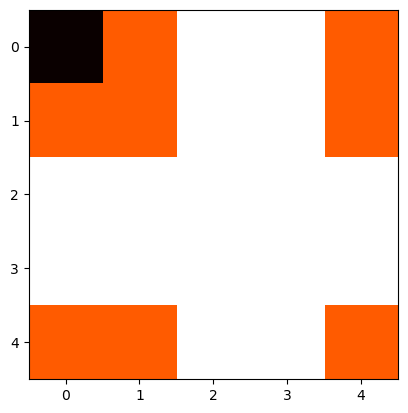

In [1]:
import numpy as np
import matplotlib.pyplot as plt

a = 2*np.ones((5, 5), int) # make numpy array with data
a[0,0] = 0                 # black cell
a[0,1] = a[1,0] = a[1,1] = a[4,4] = a[4,0] = a[4,1] = a[0,4] = a[1,4] = 1 # red cells
plt.imshow(a, cmap='hot');            # create heatmap 0 is black, 1 is red, 2 is white
                                      # don't worry - you don't have to understand the plot commands, yet. 

(a) (2 points) Write a function called `valid_board()` that determines whether a $m\times n$ numpy array is a valid game-of-life board. That means that your function should return the boolean value `True` if every entry in the array is either 0 or 1 and otherwise should return `False`. 

In [6]:
def valid_board(array):
    """checks whether NumPy array is valid game board for game-of-life"""
    return ((array==0)|(array==1)).all()

    # create boolean for each entry which is true if the entry is either 0 or 1. 
    # Return True if all entries of the mask are True

In [7]:
# Check that your function works as it is supposed to 
valid_board(np.array([[0,1,0],[1,1,0]]))==True
valid_board(np.array([[0,3,0],[-1,1,0]]))==False

True

(b) (5 points) Write a function called `evolution()` that takes as its input a two-dimendional Numpy array. Check, whether the array is a valid game-of-life board. If it is, return the board at the next evolution time step (that is apply the above rules to every cell and return a game board with live or dead cells one time step later). If the board is not valid, return the print statement "your board is not valid". 

Don't forget to comment your code!

In [8]:
def evolution(array):
    """evolves game board for game-of-life for one time-step"""
    if valid_board(array):
        a = array # making the name shorter so that we don't have to type so much
        m,n = a.shape # find shape (rows, columns) of input array
                      # we're making a new array with two more rows and two more 
                      # columns by replicating the "border" rows/columns on the respective other sides.   
                
        b = (-1)*np.ones((m,n)) # make new array for the next time step (currently filled with negative ones)
        
        left = a[:,0] # replicate left-most and right-most column
        right = a[:,n-1]

        new_a = np.concatenate((right[:, np.newaxis],a, left[:,np.newaxis]), axis = 1) # glue on right,left
        
        top = new_a[0,:] # replicate top and bottom row (already includes "corners") 
        bottom = new_a[m-1,:]
        
        new_a = np.concatenate((bottom[np.newaxis,:],new_a, top[np.newaxis,:]), axis = 0) # glue on top, bottom
        
        for r in range(1,m+1):
            for c in range(1,n+1): # go through each cell in original array 
                
                cell = new_a[r,c]  # value of the cell itself
                neighbors = new_a[r-1:r+2, c-1:c+2] # neighbor arrays (inlcudes cell itself at the center)

                if cell == 1:  # for live cells
                    if np.sum(neighbors)-cell <2: # if there are fewer than 2 live neighbors, kill the cell
                        b[r-1,c-1] = 0
                    elif np.sum(neighbors)-cell >3: # if there are more than 3 live neighbors, kill the cell
                        b[r-1,c-1] = 0
                    else:                        # if there are 2 or 3 live neighbors, cell stays alive
                        b[r-1,c-1] = 1
                    
                if cell == 0:  # for dead cells
                    if np.sum(neighbors) ==3: # if there are exactly three live neighbors, cell comes alive
                        b[r-1,c-1] = 1
                    else:                  # otherwise it stays dead
                        b[r-1,c-1] = 0
                        
        return b
        
    else:
        return print("your board is not valid")

**Optional:** If you are not able to implement the `evolution()` function above, provide a written description of your algorithm here instead for potential partial credit. 

Algorithm description:

In [9]:
# Check your evolution function 

evolution(np.array([[1, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 1],
       [0, 1, 0, 1, 1],
       [0, 0, 0, 0, 0]]))==np.array([[0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 1., 1.],
       [1., 0., 1., 1., 0.]])

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

**Remark:** The function `print_board()` defined below takes a $m \times n$ NumPy array as its input and returns a printed image of the live (black) and dead (white) cells. Execute the code below to define the function. 

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def print_board(array):
    """visualizes game board for game of life"""
    plt.imshow(array, cmap = 'binary');

(c) (4 points) Use either NumPy or Scipy to generate a game-of-life board of size $10 \times 10$ in which each cell is a Bernoulli(p) random variable. That is, assume that cells are independent and that each value is 1 with probability p or otherwise 0. Start with p=0.5. Look at your initial board (you don't have to show the image). Show the visualization of the board after 100 steps of evolution. Repeat this process for a number of different random seeds (at least 10 different seeds). You do not have to show us your plots (you can only show one plot at a time per Juypter Notebook cell with the `print_board()` function). What happens if you start with a different (larger, smaller) value of p? Please describe what you observe. 

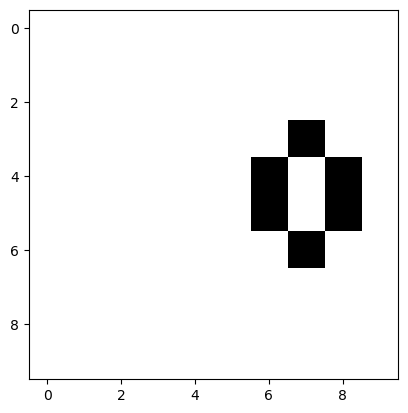

In [34]:
p = 0.5

#np.random.seed(10)
gol = np.random.binomial(1,p,(10,10))    
#print_board(gol) # visualize original random board

for i in range(100):
    gol = evolution(gol)
        
print_board(gol) #visualize board after 100 steps

When we start with p=0.5, there are sometimes several shapes and sometimes none. For larger values of p (e.g., p=0.8) we are much more likely to end up with an all blank board. For smaller values of p (e.g., p=0.3) the board is often blank and has sometimes regular figures (regular in the sense that they are still lifes or oscillators). The more extreme p is (closer to 0 or 1) the more likely are we to see an all blank board after 100 iterations. If the board is not blank for more extreme values of p, then the shapes that remain are regular. 